What we have done during Feb 12 - Feb 16: <br>
Found the github repo of the paper: https://github.com/ntranoslab/esm-variants <br>
Deployed model locally <br>
Made visualization - colormap <br>
Verified visualization with pic from paper <br>
Completed a "walkthrough" from source data --> esm_scores --> visualization <br>
<br>
TODO: <br>
Move the project from local to CSL/cloud? (esm1b model takes ~7GB) <br>
Learn some bio basics (e.g. amino acid sequence vs DNA sequence) <br>
Follow Prof Nadav <br>

Proof of initialization: <br>
![Proof_of_init.png](./Proof_of_init.png)

Displaying visualization <br>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors

In [2]:
AAorder = ['K','R','H','E','D','N','Q','T','S','C','G','A','V','L','I','M','P','Y','F','W']

# missense_path = r'./examples/esm_scores.csv'
# mut_col = "mut_name"
# score_col = "esm_score"
missense_path = r'./examples/IGLV4-69 (LV469) _ A0A075B6H9.csv'
mut_col = "variant"
score_col = "score"

# multi_residue_path = r'./examples/esm_multi_residue_scores.csv'
output_fig_path = r'./examples/output.jpg'

In [3]:
def load_missense_data(missense_path, mut_col, score_col):
    # Load missense mutation data
    missense_df = pd.read_csv(missense_path)

    # Extract position and mutant amino acid
    missense_df["original_aa"] = missense_df[mut_col].str[0]  # First letter is original AA
    missense_df["position"] = missense_df[mut_col].str.extract(r'(\d+)').astype(int)
    missense_df["mut_aa"] = missense_df[mut_col].str[-1]  # Get last character (mutated AA)

    # Pivot to create a heatmap-friendly format
    missense_pivot = missense_df.groupby(["mut_aa", "position"])[score_col].sum().unstack()
    missense_pivot = missense_pivot.reindex(AAorder)

    unique_positions = sorted(missense_df["position"].unique())
    position_labels = [f"{missense_df[missense_df['position'] == pos]['original_aa'].values[0]} {pos}"
                       for pos in unique_positions]
    print(len(position_labels))
    
    return missense_pivot, position_labels

In [4]:
missense_pivot, position_labels = load_missense_data(missense_path, mut_col, score_col)

119


In [5]:
# # Load multi-residue mutation data
# multi_residue_df = pd.read_csv(multi_residue_path)

# # Create a DataFrame to store multi-residue scores
# max_pos = multi_residue_df["start_pos"].max() + multi_residue_df["wt_seq"].str.len().max()
# multi_pivot = pd.DataFrame(np.nan, index=["Multi-Residue"], columns=range(1, max_pos + 1))

# # Assign scores across their range
# for _, row in multi_residue_df.iterrows():
#     start = row["start_pos"]
#     end = start + len(row["mut_seq"]) - len(row["wt_seq"])
#     multi_pivot.loc["Multi-Residue", start:end] = row["esm_score"]


In [6]:
viridis_r = plt.colormaps.get_cmap("viridis_r")
darker_viridis_r = mcolors.ListedColormap(np.vstack((viridis_r(np.linspace(0, 0.85, 128)) ** 1.45,
                                                     viridis_r(np.linspace(0.85, 1, 128)) ** 1.05
                                                    )))

In [7]:
def plot_heatmap(missense_pivot, position_labels, output_fig_path, figsize):
    # Combine both heatmaps
    full_df = missense_pivot

    plt.figure(figsize=figsize)
    ax = sns.heatmap(full_df, cmap=darker_viridis_r, vmax=0, vmin=-26.5, center=0, xticklabels=position_labels, yticklabels=1)

    cbar = ax.collections[0].colorbar
    cbar.ax.set_title("LLR")

    plt.xticks(rotation='vertical')
    plt.yticks(rotation='horizontal')

    plt.xlabel("Protein sequence")
    plt.ylabel("Amino acid change")
    plt.title("Missense Effects")

    plt.savefig(output_fig_path)
    plt.show()

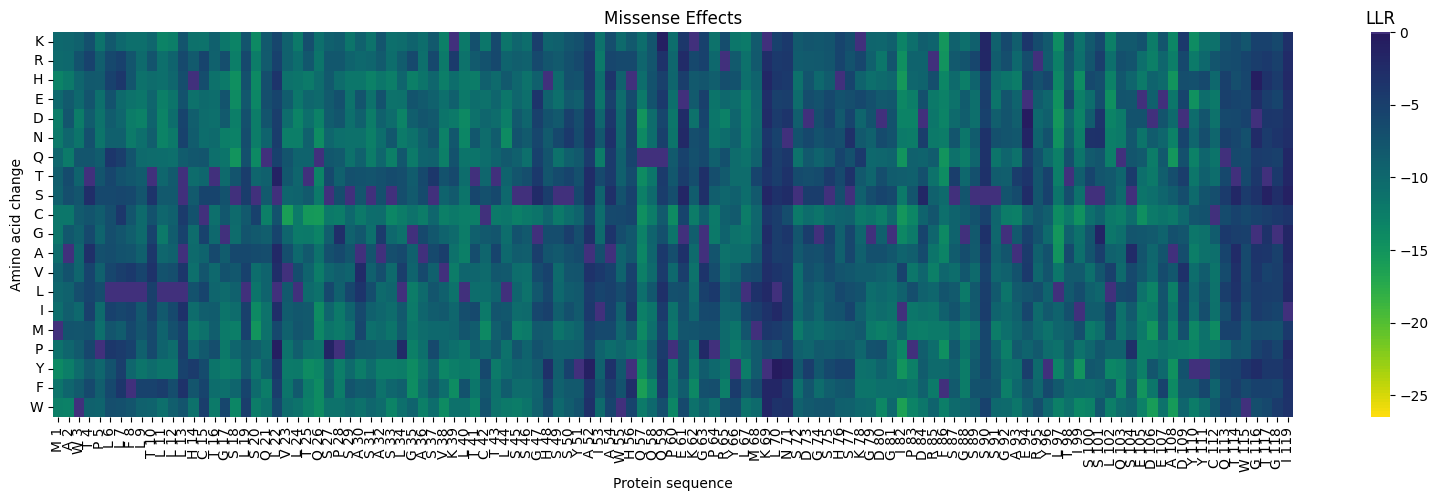

In [8]:
plot_heatmap(missense_pivot, position_labels, output_fig_path, figsize = (20, 5))

Below is the 1st colormap we used: <br>
![1st_colormap.png](./examples/1st_colormap.png)

Below are the picture provided in the paper: <br>
Also available on: https://huggingface.co/spaces/ntranoslab/esm_variants <br>
![SPAST%20%28SPAST%29%20_%20Q9UBP0.png](./examples/SPAST%20%28SPAST%29%20_%20Q9UBP0.png) <br>
![SLC7A3%20%28CTR3%29%20_%20Q8WY07.png](./examples/SLC7A3%20%28CTR3%29%20_%20Q8WY07.png) <br>
![ARX%20%28ARX%29%20_%20Q96QS3.png](./examples/ARX%20%28ARX%29%20_%20Q96QS3.png) <br>

Data below comes from: https://huggingface.co/spaces/ntranoslab/esm_variants <br>

616


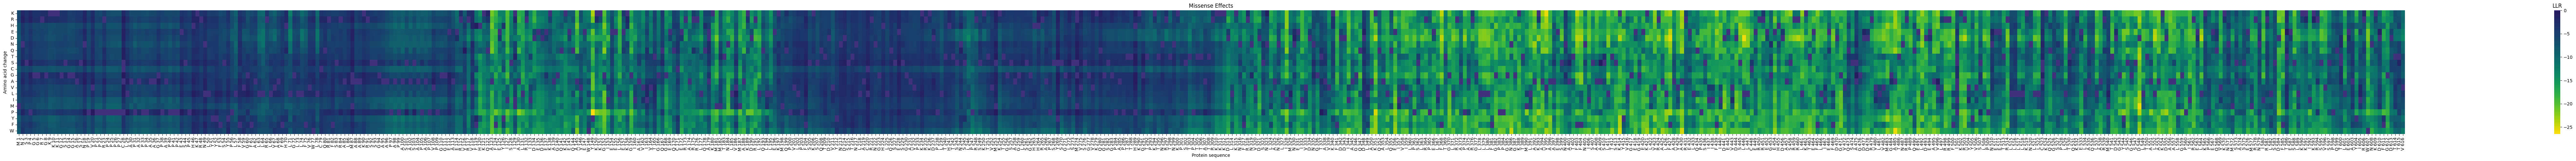

In [9]:
curr_gene = r'SPAST (SPAST) _ Q9UBP0'
missense_path = rf'./examples/{curr_gene}.csv'
output_fig_path = rf'./examples/{curr_gene}_gen.jpg'
missense_pivot, position_labels = load_missense_data(missense_path, mut_col, score_col)
plot_heatmap(missense_pivot, position_labels, output_fig_path, figsize = (120, 5))

619


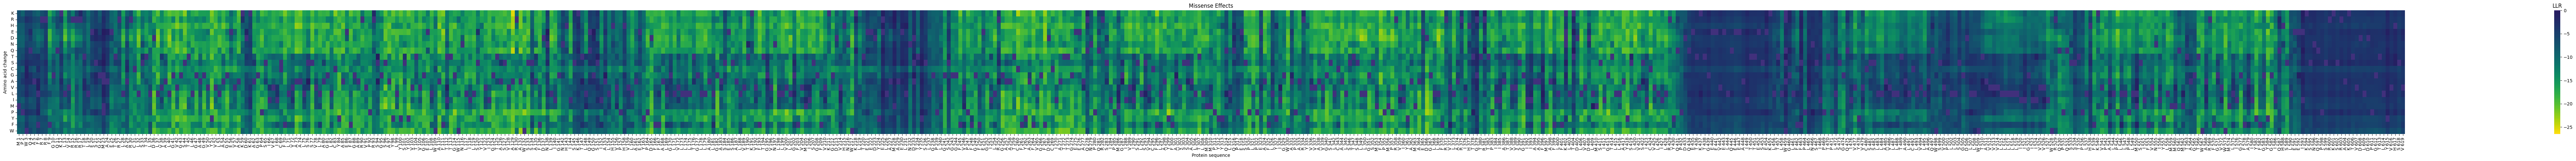

In [10]:
curr_gene = r'SLC7A3 (CTR3) _ Q8WY07'
missense_path = rf'./examples/{curr_gene}.csv'
output_fig_path = rf'./examples/{curr_gene}_gen.jpg'
missense_pivot, position_labels = load_missense_data(missense_path, mut_col, score_col)
plot_heatmap(missense_pivot, position_labels, output_fig_path, figsize = (120, 5))

562


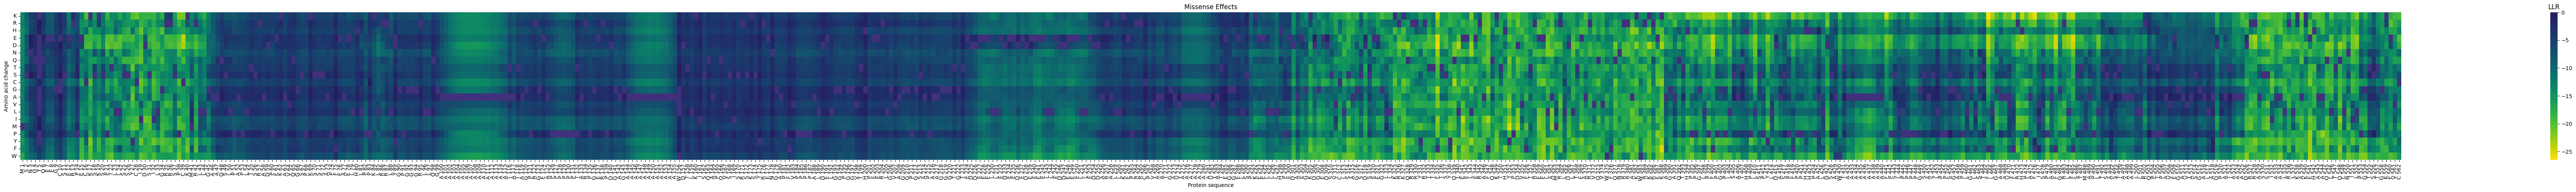

In [11]:
curr_gene = r'ARX (ARX) _ Q96QS3'
missense_path = rf'./examples/{curr_gene}.csv'
output_fig_path = rf'./examples/{curr_gene}_gen.jpg'
missense_pivot, position_labels = load_missense_data(missense_path, mut_col, score_col)
plot_heatmap(missense_pivot, position_labels, output_fig_path, figsize = (100, 5))

Data below comes from: <br>
https://www.uniprot.org/uniprotkb/Q9UBP0/entry <br>
https://www.uniprot.org/uniprotkb/Q8WY07/entry <br>
https://www.uniprot.org/uniprotkb/Q96QS3/entry <br>

![Proof_of_analysis.png](./examples/Proof_of_analysis.png)

616


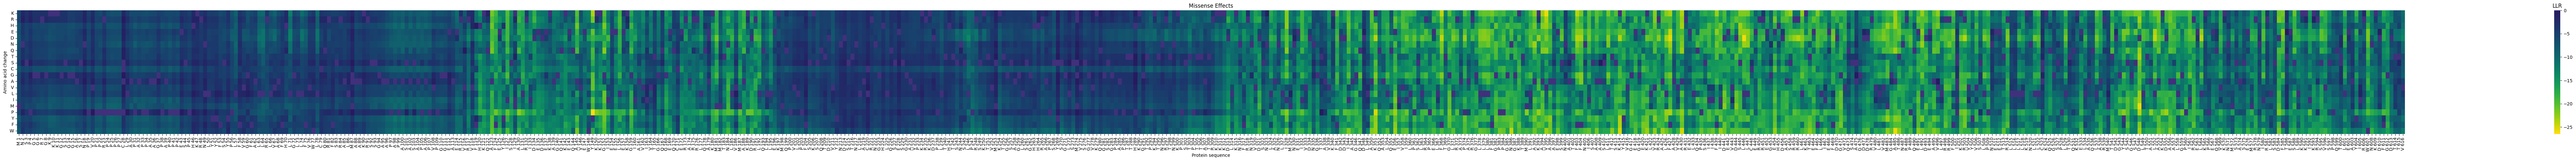

In [12]:
curr_gene = r'SPAST'
missense_path = rf'./examples/{curr_gene}.csv'
output_fig_path = rf'./examples/{curr_gene}_gen.jpg'
missense_pivot, position_labels = load_missense_data(missense_path, mut_col = "mut_name", score_col = "esm_score")
plot_heatmap(missense_pivot, position_labels, output_fig_path, figsize = (120, 5))

619


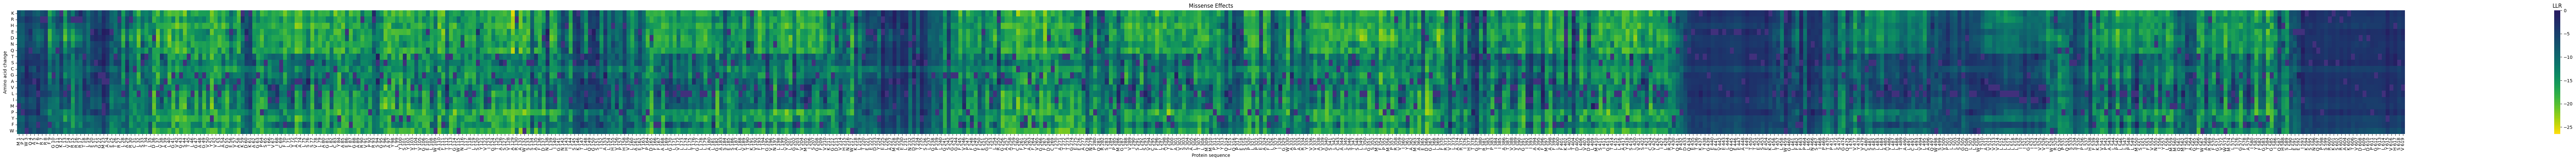

In [13]:
curr_gene = r'SLC7A3'
missense_path = rf'./examples/{curr_gene}.csv'
output_fig_path = rf'./examples/{curr_gene}_gen.jpg'
missense_pivot, position_labels = load_missense_data(missense_path, mut_col = "mut_name", score_col = "esm_score")
plot_heatmap(missense_pivot, position_labels, output_fig_path, figsize = (120, 5))

562


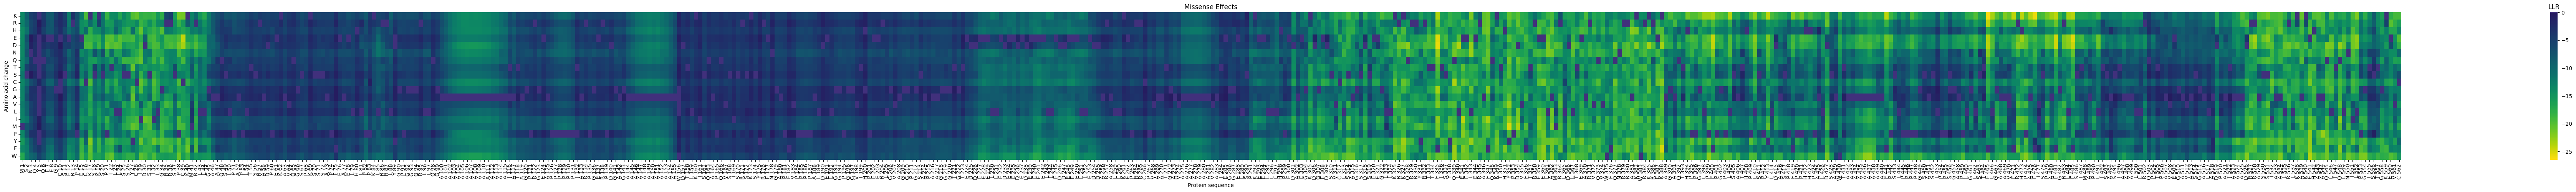

In [14]:
curr_gene = r'ARX'
missense_path = rf'./examples/{curr_gene}.csv'
output_fig_path = rf'./examples/{curr_gene}_gen.jpg'
missense_pivot, position_labels = load_missense_data(missense_path, mut_col = "mut_name", score_col = "esm_score")
plot_heatmap(missense_pivot, position_labels, output_fig_path, figsize = (100, 5))

Compare the above 3 pics with the heatmap from paper: <br>
![heatmap_from_paper.png](./examples/heatmap_from_paper.png)

In [15]:
# # Simulated MSA coverage data (replace with actual values per residue)
# msa_coverage = np.random.choice([0, 1], size=max_pos, p=[0.2, 0.8])  # 1 = covered, 0 = not covered

# # Functional domain annotations (example dictionary)
# domains = {
#     "SPAST": [("MIT domain", 300, 450)],
#     "SLC7A3": [("CAT_C domain", 600, 750)],
#     "ARX": [("PA1", 150, 200), ("PA2", 300, 350), ("Acidic", 450, 550)]
# }

In [16]:
# proteins = ["SPAST", "SLC7A3", "ARX"]
# fig, axes = plt.subplots(len(proteins), 1, figsize=(20, 12), sharex=True, 
#                          gridspec_kw={'height_ratios': [1, 1, 1], 'hspace': 0.5})

# for i, protein in enumerate(proteins):
#     ax = axes[i]

#     # Merge missense & multi-residue data
#     combined_df = pd.concat([missense_pivot, multi_pivot])

#     # Plot heatmap
#     sns.heatmap(combined_df, ax=ax, cmap="viridis", center=0, xticklabels=50, yticklabels=1, 
#                 cbar_kws={'shrink': 0.5})

#     # Plot MSA Coverage (as Blue Bars)
#     ax.bar(range(1, max_pos + 1), msa_coverage * 0.5, color="blue", alpha=0.4, zorder=2)

#     # Overlay Functional Domains (Orange Boxes)
#     for domain, start, end in domains.get(protein, []):
#         ax.add_patch(patches.Rectangle((start, -1), end - start, 21, color="orange", alpha=0.5))
#         ax.text((start + end) / 2, -2, domain, ha="center", va="top", fontsize=10, color="black")

#     # Adjust Title
#     ax.set_title(protein, fontsize=16, pad=10)

# plt.xlabel("Residue position", fontsize=14)
# plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1, hspace=0.6)

# plt.savefig(r'./examples/temp.jpg')
# plt.show()